In [95]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

In [69]:
tele = pd.read_csv("TelcoChurn.csv")

In [70]:
tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
tele.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [73]:
tele['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

[Text(0.5, 1.0, 'Relationship between MonthlyCharges and Gender')]

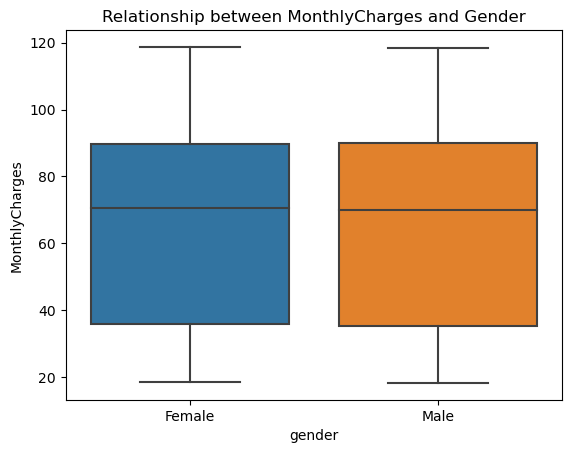

In [74]:
sns.boxplot(y = tele['MonthlyCharges'], x = tele['gender']).set(title = 'Relationship between MonthlyCharges and Gender')

In [75]:
tele[tele['gender'] == 'Male'].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,3555.000000,3555.000000,3555.000000
mean,0.161463,32.495359,64.327482
std,0.368009,24.656359,30.116093
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.225000
50%,0.000000,29.000000,70.100000
75%,0.000000,56.000000,89.875000
max,1.000000,72.000000,118.350000


In [76]:
tele[tele['gender'] == 'Female'].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,3488.000000,3488.000000,3488.000000
mean,0.162844,32.244553,65.204243
std,0.369276,24.463233,30.061341
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,35.900000
50%,0.000000,29.000000,70.650000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [77]:
#use patsy library to prepare design matrices
import patsy
y, x = patsy.dmatrices('Churn ~ SeniorCitizen + gender + Dependents + tenure + Contract + MonthlyCharges', data = tele, return_type = 'dataframe')

In [85]:
y.columns
x.columns

Index(['Churn[No]', 'Churn[Yes]'], dtype='object')

Index(['Intercept', 'gender[T.Male]', 'Dependents[T.Yes]',
       'Contract[T.One year]', 'Contract[T.Two year]', 'SeniorCitizen',
       'tenure', 'MonthlyCharges'],
      dtype='object')

In [84]:
y.head()
x.head()

,Churn[No],Churn[Yes]
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


,Intercept,gender[T.Male],Dependents[T.Yes],Contract[T.One year],Contract[T.Two year],SeniorCitizen,tenure,MonthlyCharges
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,29.85
1,1.0,1.0,0.0,1.0,0.0,0.0,34.0,56.95
2,1.0,1.0,0.0,0.0,0.0,0.0,2.0,53.85
3,1.0,1.0,0.0,1.0,0.0,0.0,45.0,42.30
4,1.0,0.0,0.0,0.0,0.0,0.0,2.0,70.70


In [91]:
#Fit a full model
logit_model = sm.Logit(y['Churn[Yes]'], x)
logit_res = logit_model.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.433272
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Churn[Yes]   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7035
Method:                           MLE   Df Model:                            7
Date:                Fri, 01 Mar 2024   Pseudo R-squ.:                  0.2512
Time:                        16:26:58   Log-Likelihood:                -3051.5
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.5281      0.098    -15.598      0.000      -1.720      -1.336
gender[T.Male]          -0.0132      0.063     -0.209      0.834      -0.137       0.110
Dependents[T.Yes]       -0.2442      0.079     -3.081      0.002      -0.399      -0.089
Contract[T.One year]    -0.9845      0.102     -9.699      0.000      -1.183      -0.786
Contract[T.Two year]    -1.8909      0.168    -11.280      0.000      -2.219      -1.562
SeniorCitizen            0.4178      0.081      5.135      0.000       0.258       0.577
tenure                  -0.0363      0.002    -17.572      0.000      -0.040      -0.032
MonthlyCharges           0.0272      0.001     19.853      0.000       0.024       0.030
========================================================================================
"""

How does gender impact Churn?

The coefficient for Male is the log of odds ratio between the Male group and Female group = -0.0132
Since p-value is lesser than 0.05, gender is not significant

What is the impact of gender on Churn? Use odds ratio to interpret.

In [97]:
math.exp(-0.0132)

0.9868867379336502

In [101]:
round(1-0.9868867379336502,3)

0.013

Male customers have 1.3% lesser probability of churning compared to Female customers

Get the predicted probabilities and make the classification based on probabilities. You can specify the cutoff probability yourself.

In [102]:
#make classification
#get the predicted probabilities

pred_prob = logit_res.predict(x)
pred_prob

0       0.319956
1       0.098452
2       0.462112
3       0.046893
4       0.579044
          ...   
7038    0.207627
7039    0.071093
7040    0.202920
7041    0.679454
7042    0.049220
Length: 7043, dtype: float64

In [103]:
#Classify based on a threshold
pred_classification = (pred_prob > 0.5).astype(int)

In [105]:
pred_classification

0       0
1       0
2       0
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Length: 7043, dtype: int32

In [107]:
y['churn_predicted'] = pred_classification

In [110]:
y['churn_predicted'] = y['churn_predicted'].astype(float)

In [114]:
from sklearn.metrics import accuracy_score

In [118]:
score =accuracy_score(y['Churn[Yes]'],y['churn_predicted'])

In [119]:
score

0.7907141842964646

In [120]:
y['correct_predictions'] = np.where(y['Churn[Yes]'] == y['churn_predicted'], 1, 0)

In [121]:
y['correct_predictions'].sum() / len(y)

0.7907141842964646

What is the percentage of accurate prediction?

79% is correctly predicted